<a href="https://colab.research.google.com/github/RodrigodeFeo/8DTS/blob/main/Aula_1_6_DTS_PLN_Exerc%C3%ADcios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exercícios - Aula 1**

## 1) Dado o dataset de produtos [1]:

[1] - https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv

In [1]:
import pandas as pd

df = pd.read_csv(
    "https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv",
    delimiter=";",
    encoding='utf-8' )

#### 1.1. Analise o % de valores nulos no dataset

In [2]:
# resposta
df.isnull().sum()

nome            0
descricao    1164
categoria       0
dtype: int64

#### 1.2. Remova os registros/linhas com valores nulos, se houver

In [3]:
# resposta
df_sem_nulos = df.dropna()
df_sem_nulos.isnull().sum()

nome         0
descricao    0
categoria    0
dtype: int64

#### 1.3. Analise a distribuição das “categorias”

In [4]:
# resposta
df_sem_nulos['categoria'].value_counts()

categoria
livro        838
maquiagem    788
brinquedo    668
game         622
Name: count, dtype: int64

#### 1.4 Crie uma nova coluna chamada "texto“, concatenando as colunas "nome" e "descricao"


In [6]:
# resposta
df_sem_nulos['texto'] = df_sem_nulos['nome'] + ' ' + df_sem_nulos['descricao']
df_sem_nulos['texto'].head()

<ipython-input-6-cbdabc464695>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_nulos['texto'] = df_sem_nulos['nome'] + ' ' + df_sem_nulos['descricao']


0     O Hobbit - 7ª Ed. 2013  Produto NovoBilbo Bol...
1     Livro - It A Coisa - Stephen King  Produto No...
2     Box  As Crônicas De Gelo E Fogo  Pocket  5 Li...
3     Box Harry Potter  Produto Novo e Físico  A sé...
4     Livro Origem - Dan Brown  Produto NovoDe Onde...
Name: texto, dtype: object

#### 1.5 Descubra as 10 palavras que mais ocorrem nessa nova coluna “texto”

In [18]:
# exemplo de referência para montar a lógica
from collections import Counter
counter = Counter()
counter['a'] += 1
counter
counter.most_common()

counter.update('a')
counter.update('b')

palavras = df_sem_nulos['texto'].str.split()
palavras = palavras.values.tolist()
palavras = sum(palavras, [])

counter = Counter(palavras)
counter.most_common(10)

[('de', 21579),
 ('e', 14331),
 ('o', 10019),
 ('a', 9743),
 ('do', 7760),
 ('-', 7413),
 ('para', 7136),
 ('que', 6420),
 ('em', 5912),
 ('com', 5173)]

### **Bônus!** Monte uma nuvem de palavras

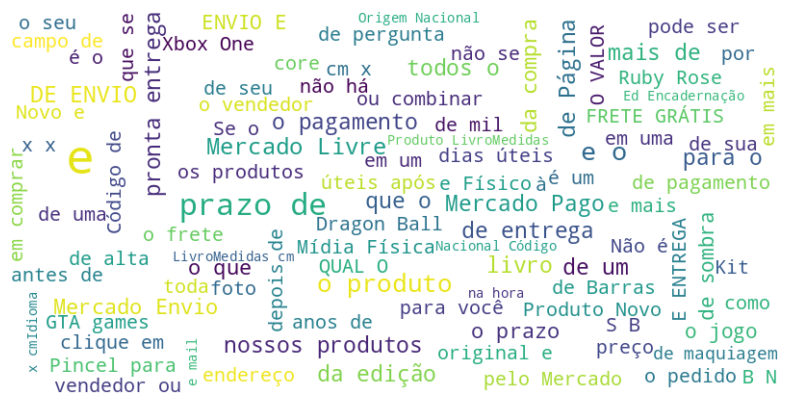

In [9]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# resposta
text = ' '.join(df_sem_nulos['texto'])

wordcloud = WordCloud(width=800,height=400, max_font_size=50, max_words=100, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 2) Utilizando o dataset de produtos [1]:

In [10]:
import pandas as pd

df = pd.read_csv(
    "https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv",
    delimiter=";",
    encoding='utf-8' )

#### 2.1. Elimine linhas com valores nulos

In [11]:
# resposta
df_sem_nulos = df.dropna()
df_sem_nulos.isnull().sum()

nome         0
descricao    0
categoria    0
dtype: int64

#### 2.2. Adicione uma nova coluna chamada texto, formada pela composição das colunas nome e descrição

In [12]:
# resposta
df_sem_nulos['texto'] = df_sem_nulos['nome'] + ' ' + df_sem_nulos['descricao']
df_sem_nulos['texto'].head()

<ipython-input-12-cbdabc464695>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_nulos['texto'] = df_sem_nulos['nome'] + ' ' + df_sem_nulos['descricao']


0     O Hobbit - 7ª Ed. 2013  Produto NovoBilbo Bol...
1     Livro - It A Coisa - Stephen King  Produto No...
2     Box  As Crônicas De Gelo E Fogo  Pocket  5 Li...
3     Box Harry Potter  Produto Novo e Físico  A sé...
4     Livro Origem - Dan Brown  Produto NovoDe Onde...
Name: texto, dtype: object

#### 2.3. Conte quantos Unigramas existem antes e depois de remover stopwords (use a coluna texto)

In [13]:
# resposta
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords_pt = stopwords.words('portuguese')

palavras = df_sem_nulos['texto'].str.split()
palavras = palavras.values.tolist()
palavras = [palavra for palavra in palavras if palavra not in stopwords_pt]
palavras = sum(palavras, [])

print(len(palavras))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


553504


#### 2.4. Conte quantos Bigramas existem antes e depois de remover stopwords (use a coluna texto)

In [14]:
# resposta
from nltk.util import ngrams

bigramas = list(ngrams(palavras, 2))
print(len(bigramas))

553503


#### 2.5. Conte quantos Trigramas existem antes e depois de remover stopwords (use a coluna texto)

In [15]:
# resposta

trigramas = list(ngrams(palavras, 3))
print(len(trigramas))

553502


#### 2.6. Conte quantos unigramas existem na coluna texto após aplicar Stemmer (utilize rslp)

In [17]:
# resposta
import nltk
nltk.download('rslp')
from nltk.stem.rslp import RSLPStemmer

stemmer = RSLPStemmer()
palavras_stem = [stemmer.stem(palavra) for palavra in palavras]
print(len(palavras_stem))

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


553504
